In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style='white', context='notebook', palette='deep')
plt.figure(figsize=(10,15))

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

In [2]:
# !pip install pandas_profiling
#from pandas_profiling import ProfileReport
#p1=ProfileReport(df)
#p1


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df=pd.read_excel('cardekho.xlsx')
df

,Vehicle_Name,Mfr,Wheels,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,Maruti,4,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,Maruti,4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,Maruti,4,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,Maruti,4,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,Maruti,4,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...,...,...,...
296,city,Honda,4,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,brio,Honda,4,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,city,Honda,4,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,city,Honda,4,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


In [3]:
df.drop(columns=['Owner'],axis=True) # drop columns

,Vehicle_Name,Mfr,Wheels,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Selling_Price
0,ritz,Maruti,4,2014,5.59,27000,Petrol,Dealer,Manual,3.35
1,sx4,Maruti,4,2013,9.54,43000,Diesel,Dealer,Manual,4.75
2,ciaz,Maruti,4,2017,9.85,6900,Petrol,Dealer,Manual,7.25
3,wagon r,Maruti,4,2011,4.15,5200,Petrol,Dealer,Manual,2.85
4,swift,Maruti,4,2014,6.87,42450,Diesel,Dealer,Manual,4.60
...,...,...,...,...,...,...,...,...,...,...
296,city,Honda,4,2016,11.60,33988,Diesel,Dealer,Manual,9.50
297,brio,Honda,4,2015,5.90,60000,Petrol,Dealer,Manual,4.00
298,city,Honda,4,2009,11.00,87934,Petrol,Dealer,Manual,3.35
299,city,Honda,4,2017,12.50,9000,Diesel,Dealer,Manual,11.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Vehicle_Name   301 non-null    object 
 1   Mfr            301 non-null    object 
 2   Wheels         301 non-null    int64  
 3   Year           301 non-null    int64  
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
 10  Selling_Price  301 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 26.0+ KB


In [5]:
df.isnull().sum().sum()   # direct null values calculation

0

In [6]:
df.isnull().sum().sum()/df.size * 100  # null Values in Percentage %

0.0

In [7]:
df.isnull().sum()/len(df) * 100       # is hare any columns having 40% null values drop this columns

Vehicle_Name     0.0
Mfr              0.0
Wheels           0.0
Year             0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
Selling_Price    0.0
dtype: float64

In [8]:
df.isnull()     # True is a null values And False is a nut null values

,Vehicle_Name,Mfr,Wheels,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in df.columns:   # check the how many percentage data in our per columns
    num_data_points = df[column].count()
    total_data_points = len(df[column])
    percentage = (num_data_points / total_data_points) * 100
    print(f"Percentage of data in column '{column}': {percentage:.2f}%")

Percentage of data in column 'Vehicle_Name': 100.00%
Percentage of data in column 'Mfr': 100.00%
Percentage of data in column 'Wheels': 100.00%
Percentage of data in column 'Year': 100.00%
Percentage of data in column 'Present_Price': 100.00%
Percentage of data in column 'Kms_Driven': 100.00%
Percentage of data in column 'Fuel_Type': 100.00%
Percentage of data in column 'Seller_Type': 100.00%
Percentage of data in column 'Transmission': 100.00%
Percentage of data in column 'Owner': 100.00%
Percentage of data in column 'Selling_Price': 100.00%


In [4]:
df.shape

(301, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Vehicle_Name   301 non-null    object 
 1   Mfr            301 non-null    object 
 2   Wheels         301 non-null    int64  
 3   Year           301 non-null    int64  
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
 10  Selling_Price  301 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 26.0+ KB


In [6]:
df.dtypes

Vehicle_Name      object
Mfr               object
Wheels             int64
Year               int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Selling_Price    float64
dtype: object

In [7]:
# df['Wheels']=df['Wheels'].astype=('object')

In [8]:
df.describe() # numerical only 

,Wheels,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,3.355482,2013.627907,7.628472,36947.205980,0.043189,4.661296
std,0.936240,2.891554,8.644115,38886.883882,0.247915,5.082812
min,2.000000,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2.000000,2012.000000,1.200000,15000.000000,0.000000,0.900000
50%,4.000000,2014.000000,6.400000,32000.000000,0.000000,3.600000
75%,4.000000,2016.000000,9.900000,48767.000000,0.000000,6.000000
max,4.000000,2018.000000,92.600000,500000.000000,3.000000,35.000000


In [9]:
df.describe(include='all')   # numerical and categorical

,Vehicle_Name,Mfr,Wheels,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
count,301,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000,301.000000
unique,98,14,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
top,city,Honda,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN,NaN
freq,26,70,NaN,NaN,NaN,NaN,239,195,261,NaN,NaN
mean,NaN,NaN,3.355482,2013.627907,7.628472,36947.205980,NaN,NaN,NaN,0.043189,4.661296
std,NaN,NaN,0.936240,2.891554,8.644115,38886.883882,NaN,NaN,NaN,0.247915,5.082812
min,NaN,NaN,2.000000,2003.000000,0.320000,500.000000,NaN,NaN,NaN,0.000000,0.100000
25%,NaN,NaN,2.000000,2012.000000,1.200000,15000.000000,NaN,NaN,NaN,0.000000,0.900000
50%,NaN,NaN,4.000000,2014.000000,6.400000,32000.000000,NaN,NaN,NaN,0.000000,3.600000
75%,NaN,NaN,4.000000,2016.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000,6.000000


In [10]:
df['Year'].describe()  # 5 point summary is the 1 columns

count     301.000000
mean     2013.627907
std         2.891554
min      2003.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: Year, dtype: float64

In [11]:
# drop rows 
# drop rows using drop()
# index specify the indexes (row names)
#df.drop(index = [1,9,5,3,8]) drop this num of rows
df = df.drop(index=[1,2,3,4,5,6,10,70],axis=0) 

In [27]:
df = df.drop(range(1, 101)) #drop the rows in 1 to 100 

In [29]:
df

,Vehicle_Name,Mfr,Wheels,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,Maruti,4,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
101,Royal Enfield Classic 350,Eicher,2,2017,1.47,11000,Petrol,Individual,Manual,0,1.20
102,KTM RC200,KTM,2,2016,1.78,6000,Petrol,Individual,Manual,0,1.20
103,Royal Enfield Thunder 350,Eicher,2,2016,1.50,8700,Petrol,Individual,Manual,0,1.15
104,KTM 390 Duke,KTM,2,2014,2.40,7000,Petrol,Individual,Manual,0,1.15
...,...,...,...,...,...,...,...,...,...,...,...
288,city,Honda,4,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
289,brio,Honda,4,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
290,city,Honda,4,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
291,city,Honda,4,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


In [28]:
df = df.reset_index(drop=True) # reset the rows in the data

,Vehicle_Name,Mfr,Wheels,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,Maruti,4,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
101,Royal Enfield Classic 350,Eicher,2,2017,1.47,11000,Petrol,Individual,Manual,0,1.20
102,KTM RC200,KTM,2,2016,1.78,6000,Petrol,Individual,Manual,0,1.20
103,Royal Enfield Thunder 350,Eicher,2,2016,1.50,8700,Petrol,Individual,Manual,0,1.15
104,KTM 390 Duke,KTM,2,2014,2.40,7000,Petrol,Individual,Manual,0,1.15
...,...,...,...,...,...,...,...,...,...,...,...
288,city,Honda,4,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
289,brio,Honda,4,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
290,city,Honda,4,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
291,city,Honda,4,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


In [15]:
# Mean is the average of the data

# Median The median value is the middlemost value of the dataset, it divides the data into two equal halves. Thus,
# it is a positional value

# Mode of the data is the value which has the highest frequency

In [16]:
def mmm(x):
    mean = x.mean(df)
    median = x.median(df)
    mode = x.mode(df)[0]
    return mean,median,mode

In [17]:
data_mean=df.mean()
data_mean

Wheels               3.337884
Year              2013.593857
Present_Price        7.636348
Kms_Driven       37302.242321
Owner                0.044369
Selling_Price        4.644369
dtype: float64

In [18]:
data_median=df.median()[0]
data_median

4.0

<AxesSubplot: >

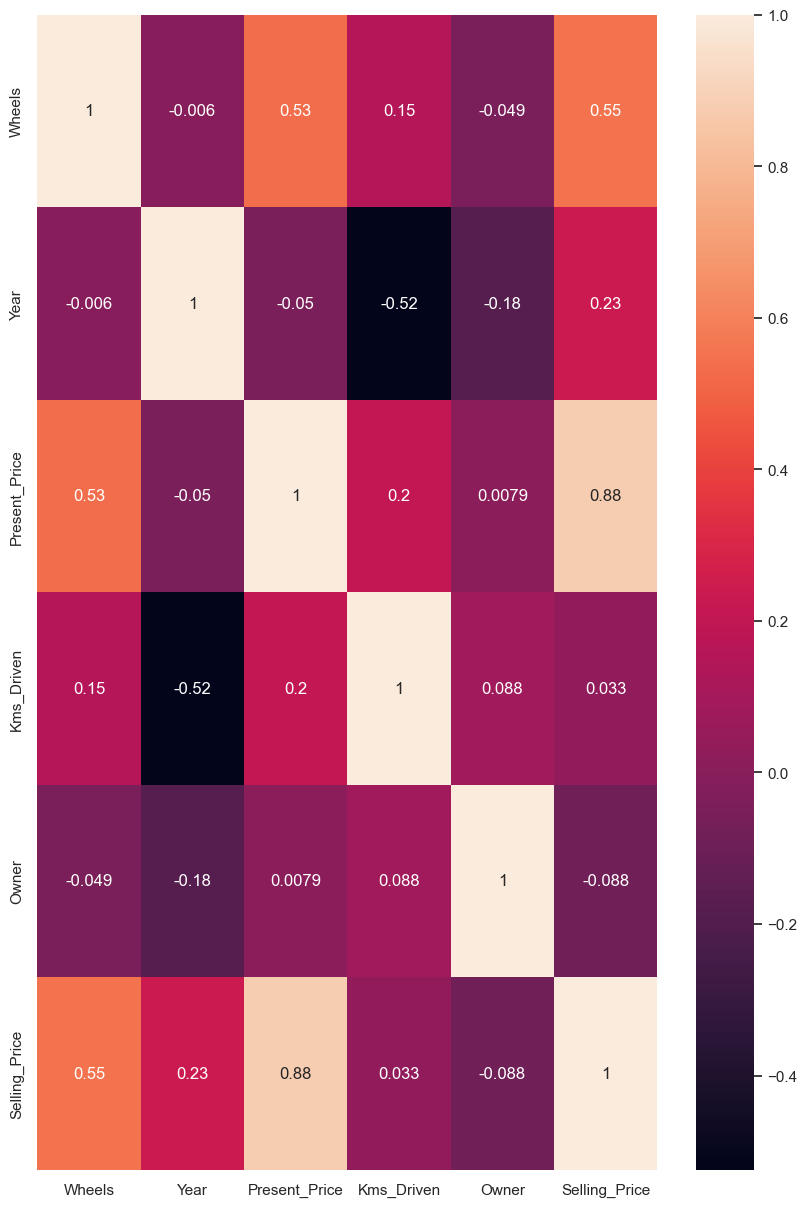

In [19]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

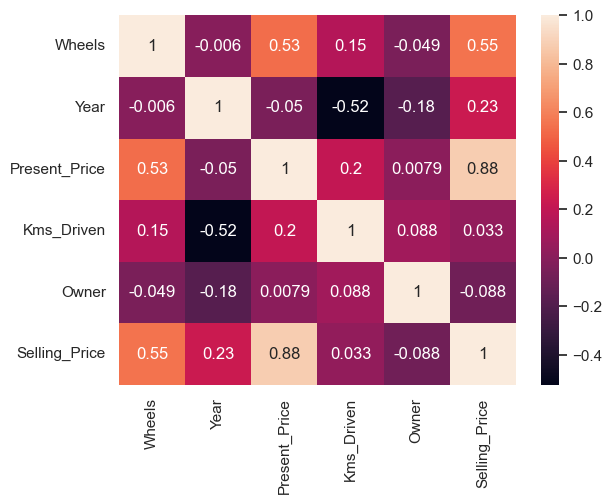

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
# pip install pandas_profiling

In [22]:
from pandas_profiling import ProfileReport
p1=ProfileReport(df)

In [23]:
p1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
!pip install sweetviz


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
df.skew()

Wheels          -0.721695
Year            -1.253638
Present_Price    4.038485
Kms_Driven       6.456328
Owner            7.511320
Selling_Price    2.486360
dtype: float64

In [26]:
df.kurt()

Wheels           -1.489370
Year              1.508210
Present_Price    30.908741
Kms_Driven       68.304343
Owner            71.309541
Selling_Price     8.739482
dtype: float64